In [49]:
#Behzad Khadim
#SP20-BCS-019
#IDS-Assignment-1

import pandas as pd
import re

from google.colab import drive
drive.mount('/content/gdrive')

data = pd.read_csv('gdrive/My Drive/testData/Hello-DataSet-Updates.csv')
data.head

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<bound method NDFrame.head of                     Name  Gender  HSSC1  HSSC2  CGPA FavoriteColor BirthMonth  \
0         Muhammad Usman    Male    440    369  2.80         Black      March   
1            Taha Ishfaq    Male    415    408  2.73           Red      March   
2        Muhammad Hamdan    Male    388    321  2.78         Black    October   
3    Syeda Maham Gillani  Female    412    440  3.11          Blue   February   
4             Umar Wasim    Male    364    469  2.42         black   October    
..                   ...     ...    ...    ...   ...           ...        ...   
129     M Abubakar Malik    Male    410    349  2.94          Blue   Feburary   
130         Muhammad Ali    Male    403    390  2.52        Yellow    October   
131         shafaqat ali    Male    424    824  3.07         Black        May   
132          Ammar Asif     Male    351    423  2.52         Black  December    
133      Muhammad Zubair    Male    361    335  2.81         Black      March  

Data Normalization

In [56]:
df = pd.DataFrame(data, columns = ['Name', 'Gender','HSSC1','HSSC2','CGPA','FavoriteColor','BirthMonth','Weight'])

df['Name'] = df['Name'].str.title()
df['Gender'] = df['Gender'].str.title()
df['BirthMonth'] = df['BirthMonth'].str.title()
df['FavoriteColor'] = df['FavoriteColor'].str.title()
df['FavoriteColor'] = df['FavoriteColor'].str.title()

UpData = df
UpData

,Name,Gender,HSSC1,HSSC2,CGPA,FavoriteColor,BirthMonth,Weight
0,Muhammad Usman,Male,440,369,2.80,Black,March,77
1,Taha Ishfaq,Male,415,408,2.73,Red,March,72
2,Muhammad Hamdan,Male,388,321,2.78,Black,October,53
3,Syeda Maham Gillani,Female,412,440,3.11,Blue,February,63
4,Umar Wasim,Male,364,469,2.42,Black,October,80
...,...,...,...,...,...,...,...,...
129,M Abubakar Malik,Male,410,349,2.94,Blue,Feburary,65
130,Muhammad Ali,Male,403,390,2.52,Yellow,October,81
131,Shafaqat Ali,Male,424,824,3.07,Black,May,58
132,Ammar Asif,Male,351,423,2.52,Black,December,68


In [51]:
from matplotlib import pyplot as plt
import numpy as np

Pie chart to show the ratio of male and female students

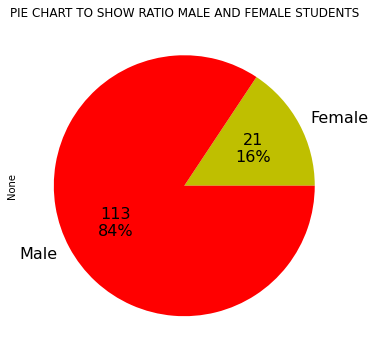

In [52]:
def label_function(val):
    return f'{val / 100 * len(UpData):.0f}\n{val:.0f}%'

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 6))

UpData.groupby('Gender').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 16},
                                  colors=['y', 'r'], title = "PIE CHART TO SHOW RATIO MALE AND FEMALE STUDENTS", ax=ax1)

plt.show()

List of Students whose name start with H

In [53]:
search ="H"

StudentWithH = data["Name"].str.startswith(search, na = False)

#with complete information of students with H
data[StudentWithH]

#just the names of the students with H
data[StudentWithH].Name


9             Hamza Naveed
21             Habib Ullah
22            Hunain Javed
58    Hafiz Malahim Labib.
60     Hamna Tariq Saleemi
77                    Hina
78        Hamza Javed Khan
80          Husnain Ahmed 
93        Hamayoun Masroor
98           Hussain Afzal
Name: Name, dtype: object

Students having three words name

In [54]:
UpData = pd.DataFrame({
    "Name": UpData.Name})
UpData
regularExpression = re.compile(r'^(\w+)\s+(.*?)\s+(\w+)$')

UpData[['first', 'middle', 'surname']] = df['Name'].str.extract(pat=regularExpression, expand=True)


histogram of all male students CGPA

<function matplotlib.pyplot.show(*args, **kw)>

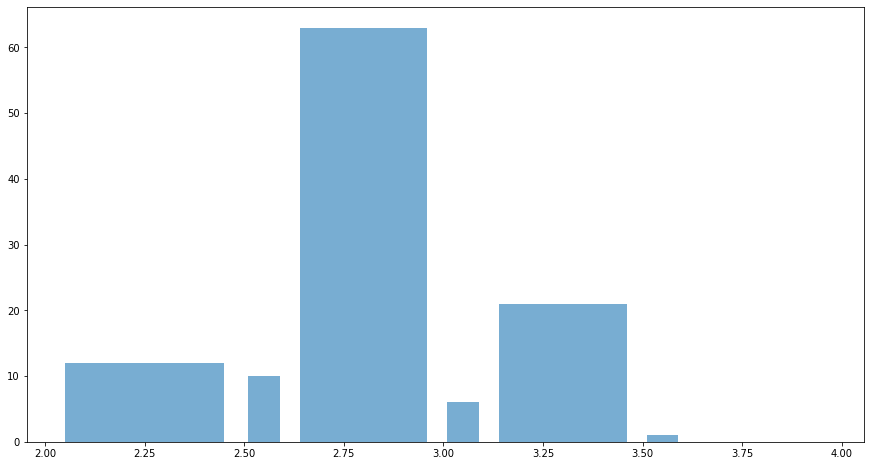

In [57]:
maleStudents = UpData.CGPA.where(UpData['Gender']>="Male").astype(str)

maleStudents.astype(float).hist(bins = [2.0,2.5, 2.6,3.0, 3.1,3.5, 3.6,4.0], figsize=(15,8), alpha =0.6 ,grid=False,rwidth =0.8)
plt.show


Percentage of students who have cgpa 3.0 or above

In [58]:
students = UpData.CGPA.where(UpData['CGPA']>=3.0).astype(str)
newstudents = students.astype(float)

newstudents = newstudents.dropna()
newstudents.reset_index()
newstudents.count() * 100 /UpData.CGPA.count() 


28.35820895522388

Scatter plot of HSSC-1 between male vs female students

In [ ]:

mStudents = UpData.HSSC1.where(UpData['Gender']=="Male").astype(str)
feStudents = UpData.HSSC1.where(UpData['Gender']=="Female").astype(str)

malestd = mStudents.astype(float)
femalestd = feStudents.astype(float)
finalMale = malestd.dropna()
finalFemale = femalestd.dropna()

finalFemale

In [60]:
raw_data = {'malestudent': finalMale, 
        'femalestudents': finalFemale}

dataframe = pd.DataFrame(raw_data, columns=['malestudent','femalestudents'])
dataframe

,malestudent,femalestudents
0,440.0,NaN
1,415.0,NaN
2,388.0,NaN
3,NaN,412.0
4,364.0,NaN
...,...,...
129,410.0,NaN
130,403.0,NaN
131,424.0,NaN
132,351.0,NaN


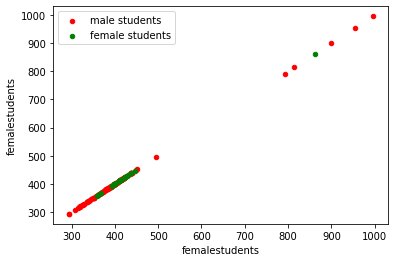

In [61]:

dataframe['result'] = np.arange(len(dataframe))**2 * 100 + 100
test1 = dataframe.plot(kind='scatter', x='malestudent', y='malestudent', color='r', label='male students')
test2 = dataframe.plot(kind='scatter', x='femalestudents', y='femalestudents', color='g', ax=test1, label='female students')



In [5]:
UpData.columns

Index(['Name', 'Gender', 'HSSC1', 'HSSC2', 'CGPA', 'FavoriteColor',
       'BirthMonth', 'Weight'],
      dtype='object')

favorite colors of male vs female students on a bar chart.

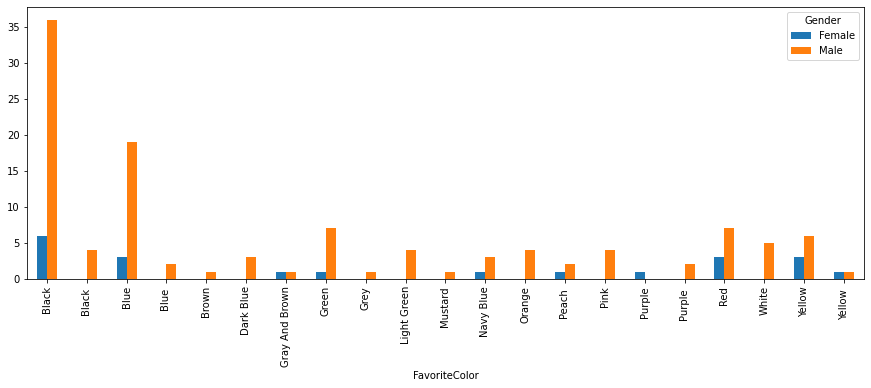

In [62]:
gender_column = UpData.Gender
UpData.groupby(["FavoriteColor", gender_column]).size().unstack(level=1).plot(kind='bar',figsize=(15,5))



In [ ]:
UpData.reset_index

Line chart of favourite color of students

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131],
 <a list of 132 Text major ticklabel objects>)

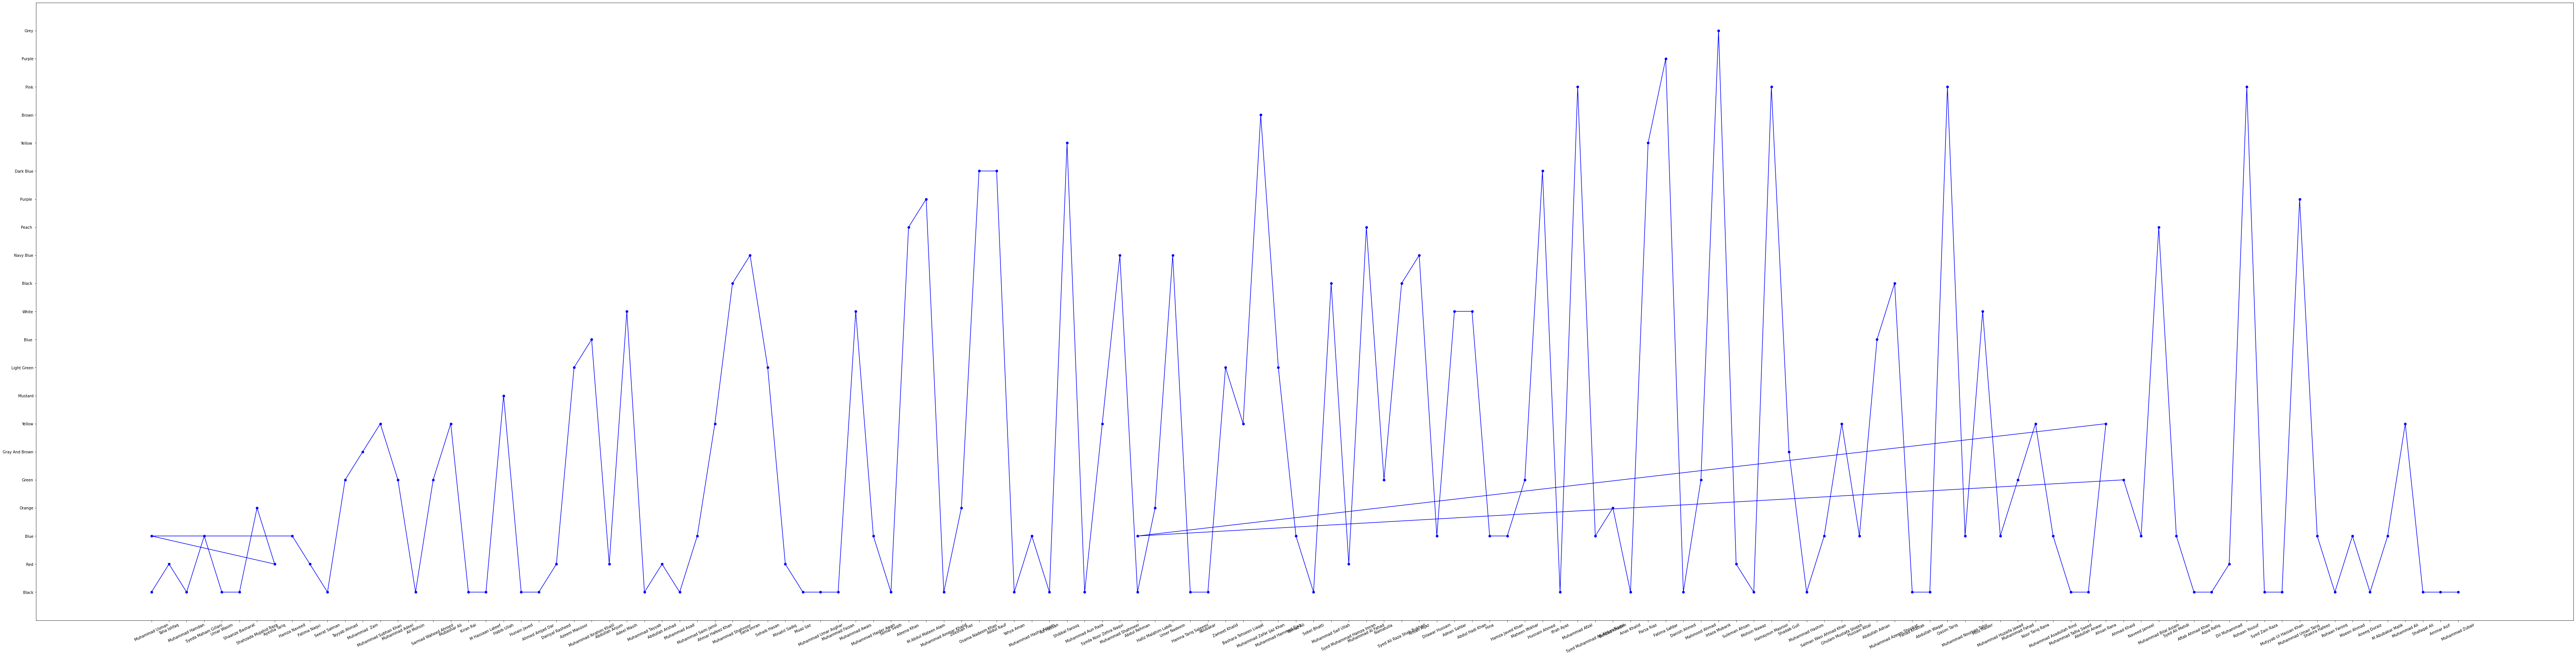

In [63]:
plt.figure(figsize=(120,30))
plt.plot(UpData.loc[:,"Name"],UpData.loc[:,"FavoriteColor"],color="blue",marker="o")
plt.xticks(rotation=25)

correlation matrix between HSSC-1 and HSSC-2 marks and then plot on a heatmap.

In [67]:
dropedData = UpData.drop(['CGPA','Weight'], axis="columns")
cor = dropedData.corr()
cor


,HSSC1,HSSC2
HSSC1,1.00000,0.13124
HSSC2,0.13124,1.00000


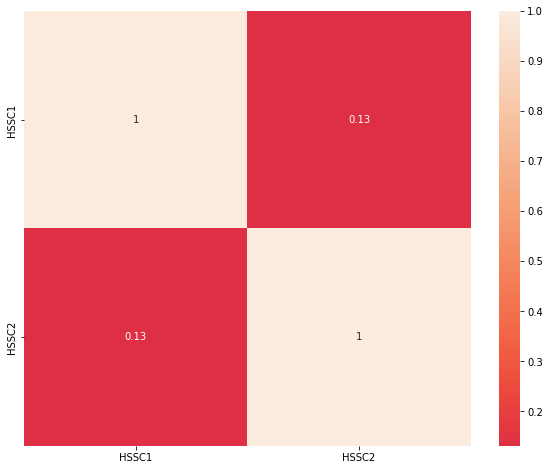

In [68]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data = cor , annot = True , cmap="rocket", center=0)

Bonus: Percentage of students with Weight 60 or above

In [69]:
students = UpData.Weight.where(UpData['Weight']>=60).astype(str)
newstudents = students.astype(float)

newstudents = newstudents.dropna()
newstudents.reset_index()
newstudents.count() * 100 /UpData.Weight.count() 

70.14925373134328

In [ ]:
Malestudents = UpData.Weight.where(UpData['Gender']=="Male").astype(str)
malestudents = Malestudents.astype(float)

Femalestudents = UpData.Weight.where(UpData['Gender']=="Female").astype(str)
femalestudents = Femalestudents.astype(float)


malestudents = malestudents.dropna()
malestudents.reset_index()

femalestudents = femalestudents.dropna()
femalestudents.reset_index()



Bonus : histogram of male studenst weights

<function matplotlib.pyplot.show(*args, **kw)>

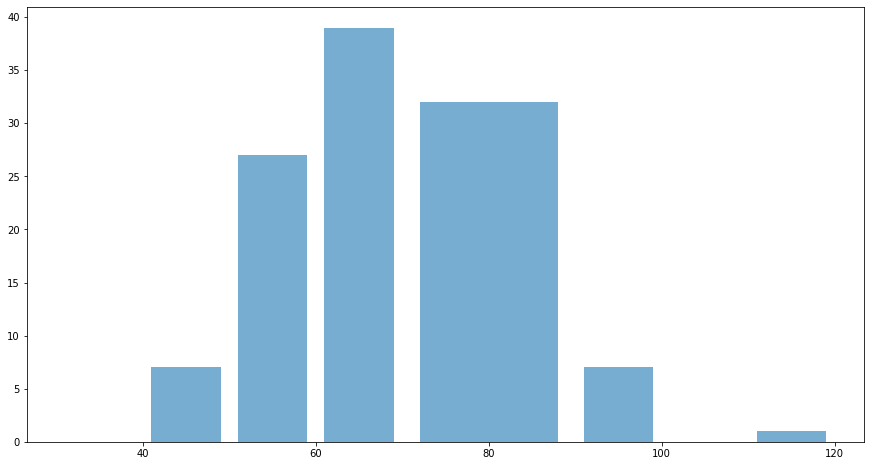

In [71]:

malestudents.astype(float).hist(bins = [30,40,50,60,70,90,100,110,120], figsize=(15,8), alpha =0.6 ,grid=False,rwidth =0.8)
plt.show

Bonus : Female students weight bar chart

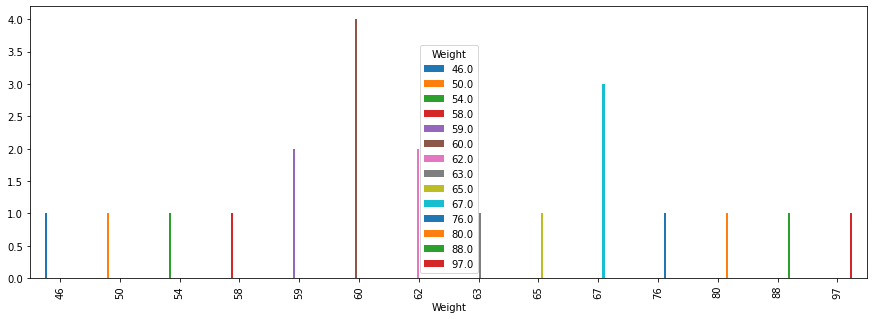

In [72]:
UpData.groupby(["Weight", femalestudents]).size().unstack(level=1).plot(kind='bar',figsize=(15,5))